## 1. Goal

To find out a set of the top features with minimum feature number selected from the experiment2 having as good performance as the original feature set

To evaluate classification performance of the low-intercorrelated feature set ('URLSimilarityIndex', 'HasSocialNet', 'NoOfCSS', and 'NoOfOtherSpecialCharsInURL')

- Readout: Classification accuracy and F1-score

- Dataset: the whole dataset (235795 URLs = 134850 legitimate and 100945 phishing URLs)


## 2. Pre-processing
- Select the top feature columns (18 columns)
- Remove label (1 column) and store as a separate vector
- Normalize columns with a range of 0 to 1
- Perform Train-test-split with 80:20 ratio


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
# Allow Google Colab to access to Google Drive (Mount)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read csv files
dataset = pd.read_csv('/content/drive/My Drive/00. BU BME/05. Spring 2024 (EC503)/Project/PhiUSIIL Phishing URL/PhiUSIIL_Phishing_URL_Dataset.csv')
top_feature_cluster_filtered = pd.read_csv('/content/drive/My Drive/00. BU BME/05. Spring 2024 (EC503)/Project/PhiUSIIL Phishing URL/top_feature_cluster_filtered.csv')
top_feature_combined = pd.read_csv('/content/drive/My Drive/00. BU BME/05. Spring 2024 (EC503)/Project/PhiUSIIL Phishing URL/top_feature_combined.csv')

# Select top features and labels for training
Top_feature_df = dataset[top_feature_combined['Feature']]
y = dataset['label']

# Define a function to normalize numerical columns
def normalize_columns(df):
    return (df - df.min()) / (df.max() - df.min())

# Apply normalization to all columns
normalized_Top_feature_df = normalize_columns(Top_feature_df)

normalized_Top_feature_df

,URLSimilarityIndex,HasSocialNet,LineOfCode,NoOfExternalRef,NoOfSelfRef,NoOfImage,HasCopyrightInfo,NoOfJS,HasDescription,IsHTTPS,DomainTitleMatchScore,NoOfCSS,URLTitleMatchScore,HasSubmitButton,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,HasFavicon,URLLength
0,1.000000,0.0,0.001256,0.004506,0.004344,0.003796,1.0,0.004025,0.0,1.0,0.000000,0.000558,0.000000,1.0,0.002004,0.080605,0.0,0.002959
1,1.000000,1.0,0.001392,0.007886,0.001424,0.005583,1.0,0.001150,0.0,1.0,0.555556,0.000251,0.555556,1.0,0.004008,0.219144,1.0,0.001644
2,1.000000,0.0,0.001050,0.000182,0.001533,0.001117,1.0,0.001006,1.0,1.0,0.466667,0.000056,0.466667,1.0,0.004008,0.173804,0.0,0.002630
3,1.000000,1.0,0.014354,0.001127,0.000803,0.000335,1.0,0.002156,0.0,1.0,0.000000,0.000754,0.000000,1.0,0.002004,0.095718,0.0,0.002137
4,1.000000,1.0,0.013751,0.003089,0.002628,0.027244,1.0,0.004887,1.0,1.0,1.000000,0.000419,1.000000,1.0,0.002004,0.075567,0.0,0.003287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,1.000000,1.0,0.004529,0.006941,0.006826,0.005695,1.0,0.003019,1.0,1.0,1.000000,0.000195,1.000000,1.0,0.002004,0.085642,1.0,0.002630
235791,1.000000,1.0,0.002438,0.001127,0.003212,0.005583,0.0,0.001006,1.0,1.0,0.000000,0.000028,0.000000,1.0,0.004008,0.178841,1.0,0.002465
235792,1.000000,1.0,0.001597,0.002435,0.002117,0.003015,1.0,0.004312,1.0,1.0,1.000000,0.000279,1.000000,1.0,0.002004,0.083123,1.0,0.002794
235793,0.280456,0.0,0.000278,0.000000,0.000000,0.000000,0.0,0.000431,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.010020,0.229219,0.0,0.006903


In [5]:
# Train-test-split by 80:20
X = normalized_Top_feature_df

# Perform train-test-split with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (188636, 18)
Shape of X_test: (47159, 18)
Shape of y_train: (188636,)
Shape of y_test: (47159,)


## 3. Evaluation of phishing detection based on varying number of features
- Two classifiers: RandomForest and SVM
- The number of top features: 1,3,5,7,10, and 18 (maximum number)
- High-rank features are selected first
- Compute average performance using 5-fold cross-validation

In [11]:
# Define a function to select top features
def select_top_features(X, y, num_features):
    # Select top features based on rankings
    top_features = top_feature_combined.head(num_features)['Feature']
    X_selected = X[top_features]
    return X_selected

# Define a function to train and evaluate classifiers
def train_and_evaluate(X_train, X_test, y_train, y_test, classifier):
    # Train classifier
    classifier.fit(X_train, y_train)

    # Predict on test set
    y_pred = classifier.predict(X_test)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, f1

# Define the numbers of top features to evaluate
num_features_list = [1, 3, 5, 7, 10, 18]


# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

# Initialize lists to store results
rf_accuracies = []
rf_f1_scores = []
svm_accuracies = []
svm_f1_scores = []

# Iterate over the numbers of top features
for num_features in num_features_list:
    # Select top features
    X_train_selected = select_top_features(X_train, y_train, num_features)
    X_test_selected = select_top_features(X_test, y_test, num_features)

    # Train and evaluate RandomForest classifier
    rf_accuracy, rf_f1 = train_and_evaluate(X_train_selected, X_test_selected, y_train, y_test, rf_classifier)
    rf_accuracies.append(rf_accuracy)
    rf_f1_scores.append(rf_f1)

    # Train and evaluate SVM classifier
    svm_accuracy, svm_f1 = train_and_evaluate(X_train_selected, X_test_selected, y_train, y_test, svm_classifier)
    svm_accuracies.append(svm_accuracy)
    svm_f1_scores.append(svm_f1)

# Print results
print("RandomForest Classifier:")
for i, num_features in enumerate(num_features_list):
    print(f"Top {num_features} features - Accuracy: {rf_accuracies[i]}, F1-score: {rf_f1_scores[i]}")

print("\nSVM Classifier:")
for i, num_features in enumerate(num_features_list):
    print(f"Top {num_features} features - Accuracy: {svm_accuracies[i]}, F1-score: {svm_f1_scores[i]}")

RandomForest Classifier:
Top 1 features - Accuracy: 0.9967344515362921, F1-score: 0.9971599291826497
Top 3 features - Accuracy: 0.9999363854195381, F1-score: 0.9999445194459342
Top 5 features - Accuracy: 0.9998939756992302, F1-score: 0.9999075289896617
Top 7 features - Accuracy: 0.9998939756992302, F1-score: 0.9999075255691801
Top 10 features - Accuracy: 1.0, F1-score: 1.0
Top 18 features - Accuracy: 1.0, F1-score: 1.0

SVM Classifier:
Top 1 features - Accuracy: 0.9967344515362921, F1-score: 0.9971599291826497
Top 3 features - Accuracy: 0.9967132466761381, F1-score: 0.9971415398801291
Top 5 features - Accuracy: 0.9967132466761381, F1-score: 0.9971415398801291
Top 7 features - Accuracy: 0.9966708369558303, F1-score: 0.9971047633097904
Top 10 features - Accuracy: 0.9997667465383065, F1-score: 0.999796601394205
Top 18 features - Accuracy: 0.9997243368179987, F1-score: 0.9997596287188211


In [12]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define a function to perform cross-validation and compute metrics
def cross_validate(X, y, classifier, num_features):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
    f1_scores = cross_val_score(classifier, X, y, cv=kf, scoring='f1')
    return np.mean(accuracy_scores), np.std(accuracy_scores), np.mean(f1_scores), np.std(f1_scores)

# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

# Initialize lists to store results
rf_accuracy_means = []
rf_accuracy_stds = []
rf_f1_means = []
rf_f1_stds = []
svm_accuracy_means = []
svm_accuracy_stds = []
svm_f1_means = []
svm_f1_stds = []

# Iterate over the numbers of top features
for num_features in num_features_list:
    # Select top features
    X_selected = select_top_features(X, y, num_features)

    # Cross-validate RandomForest classifier
    rf_accuracy_mean, rf_accuracy_std, rf_f1_mean, rf_f1_std = cross_validate(X_selected, y, rf_classifier, num_features)
    rf_accuracy_means.append(rf_accuracy_mean)
    rf_accuracy_stds.append(rf_accuracy_std)
    rf_f1_means.append(rf_f1_mean)
    rf_f1_stds.append(rf_f1_std)

    # Cross-validate SVM classifier
    svm_accuracy_mean, svm_accuracy_std, svm_f1_mean, svm_f1_std = cross_validate(X_selected, y, svm_classifier, num_features)
    svm_accuracy_means.append(svm_accuracy_mean)
    svm_accuracy_stds.append(svm_accuracy_std)
    svm_f1_means.append(svm_f1_mean)
    svm_f1_stds.append(svm_f1_std)

# Print results
print("RandomForest Classifier:")
for i, num_features in enumerate(num_features_list):
    print(f"Top {num_features} features - Average Accuracy: {rf_accuracy_means[i]}, Std: {rf_accuracy_stds[i]}, Average F1-score: {rf_f1_means[i]}, Std: {rf_f1_stds[i]}")

print("\nSVM Classifier:")
for i, num_features in enumerate(num_features_list):
    print(f"Top {num_features} features - Average Accuracy: {svm_accuracy_means[i]}, Std: {svm_accuracy_stds[i]}, Average F1-score: {svm_f1_means[i]}, Std: {svm_f1_stds[i]}")

RandomForest Classifier:
Top 1 features - Average Accuracy: 0.9966665959837995, Std: 0.000168788555670254, Average F1-score: 0.9970942849402566, Std: 0.0001433483814460575
Top 3 features - Average Accuracy: 0.999898216671261, Std: 3.1164652466516744e-05, Average F1-score: 0.9999109354064964, Std: 2.7484311039287245e-05
Top 5 features - Average Accuracy: 0.999898216671261, Std: 3.392777624633136e-05, Average F1-score: 0.9999109487437788, Std: 2.9785861502804787e-05
Top 7 features - Average Accuracy: 0.9999151805593842, Std: 3.285042809395443e-05, Average F1-score: 0.9999257752105505, Std: 2.8802715407469003e-05
Top 10 features - Average Accuracy: 1.0, Std: 0.0, Average F1-score: 1.0, Std: 0.0
Top 18 features - Average Accuracy: 0.9999872770839076, Std: 1.0388217488875175e-05, Average F1-score: 0.9999888855577843, Std: 9.075012602282298e-06

SVM Classifier:
Top 1 features - Average Accuracy: 0.9966665959837995, Std: 0.000168788555670254, Average F1-score: 0.9970942849402566, Std: 0.00014

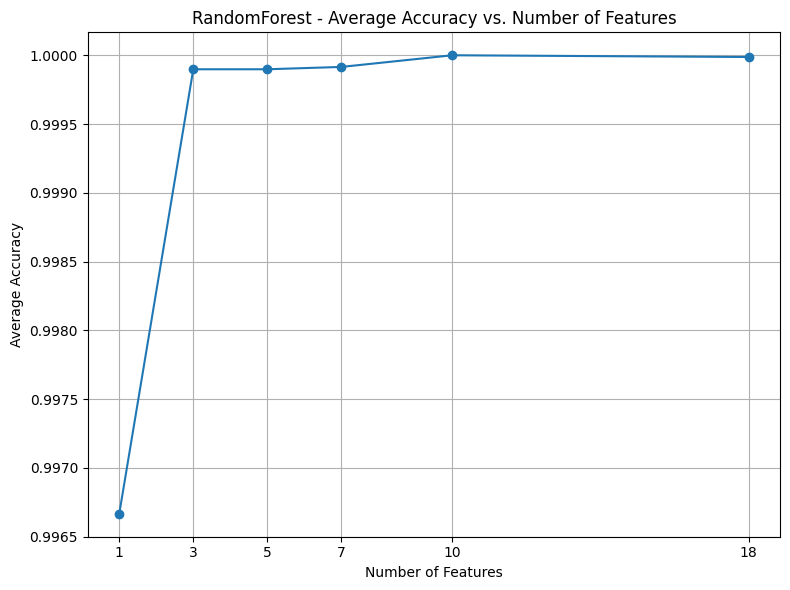

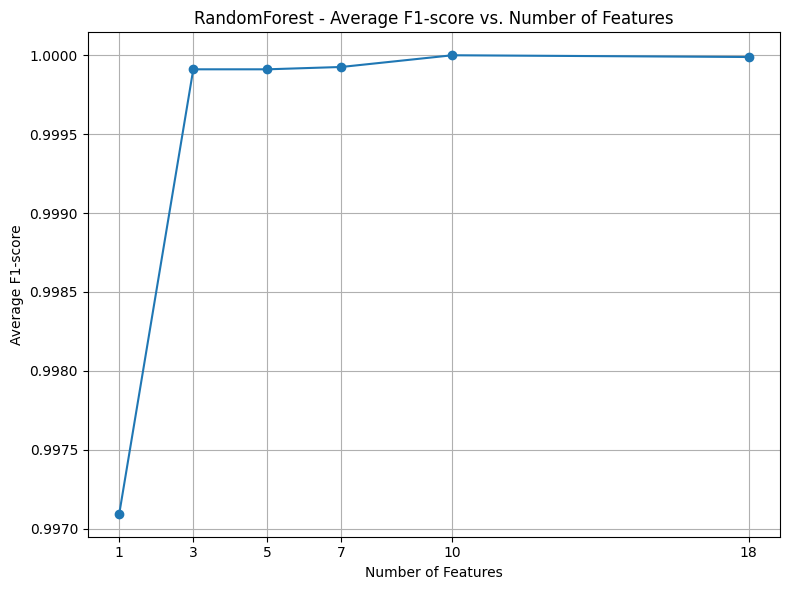

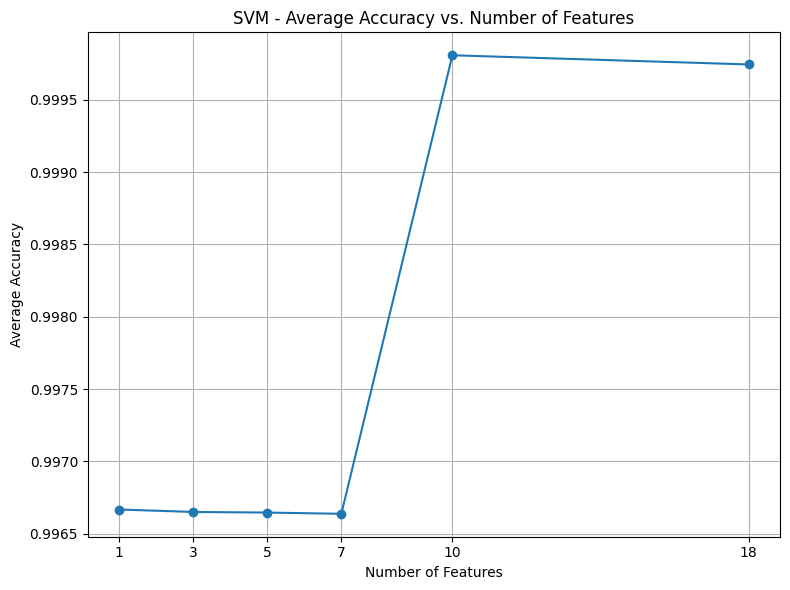

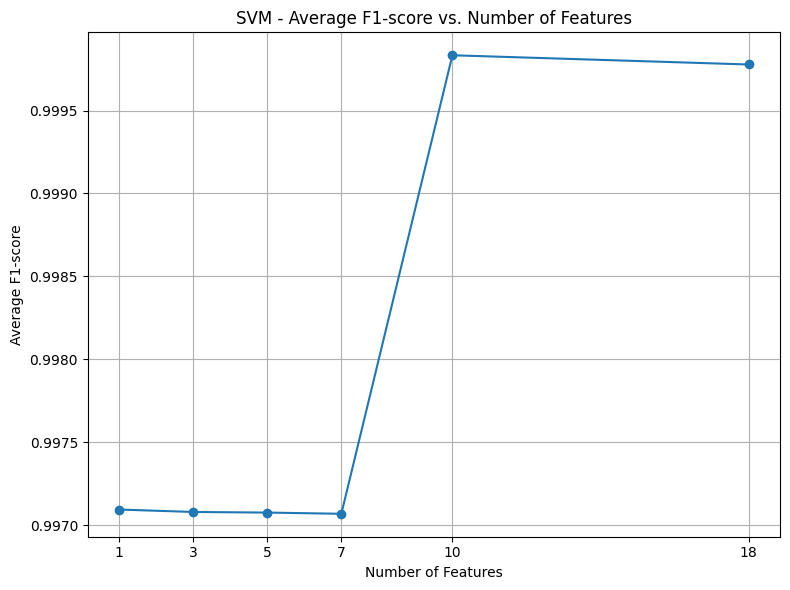

In [13]:
# Define a function to create XY plots
def plot_xy(num_features_list, metric_means, metric_name, classifier_name):
    plt.figure(figsize=(8, 6))
    plt.plot(num_features_list, metric_means, marker='o', linestyle='-')
    plt.title(f"{classifier_name} - Average {metric_name} vs. Number of Features")
    plt.xlabel("Number of Features")
    plt.ylabel(f"Average {metric_name}")
    plt.grid(True)
    plt.xticks(num_features_list)
    plt.tight_layout()
    plt.show()

# Plot RandomForest results
plot_xy(num_features_list, rf_accuracy_means, "Accuracy", "RandomForest")
plot_xy(num_features_list, rf_f1_means, "F1-score", "RandomForest")

# Plot SVM results
plot_xy(num_features_list, svm_accuracy_means, "Accuracy", "SVM")
plot_xy(num_features_list, svm_f1_means, "F1-score", "SVM")

## 4. phishing detection performance using low-intercorrelated feature set
- Classifiers: RandomForest and SVM
- Compute average performance using 5-fold cross-validation

In [17]:
# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

# Initialize lists to store results
rf_accuracy_means = []
rf_accuracy_stds = []
rf_f1_means = []
rf_f1_stds = []
svm_accuracy_means = []
svm_accuracy_stds = []
svm_f1_means = []
svm_f1_stds = []

# Select low-intercorrelated top features
X_selected = X[top_feature_cluster_filtered['Feature']]

# Cross-validate RandomForest classifier
rf_accuracy_mean, rf_accuracy_std, rf_f1_mean, rf_f1_std = cross_validate(X_selected, y, rf_classifier, num_features)
rf_accuracy_means.append(rf_accuracy_mean)
rf_accuracy_stds.append(rf_accuracy_std)
rf_f1_means.append(rf_f1_mean)
rf_f1_stds.append(rf_f1_std)

# Cross-validate SVM classifier
svm_accuracy_mean, svm_accuracy_std, svm_f1_mean, svm_f1_std = cross_validate(X_selected, y, svm_classifier, num_features)
svm_accuracy_means.append(svm_accuracy_mean)
svm_accuracy_stds.append(svm_accuracy_std)
svm_f1_means.append(svm_f1_mean)
svm_f1_stds.append(svm_f1_std)

# Print results
print("RandomForest Classifier:")
print(f"Top low-correlated features - Average Accuracy: {rf_accuracy_means}, Std: {rf_accuracy_stds}, Average F1-score: {rf_f1_means}, Std: {rf_f1_stds}")

print("\nSVM Classifier:")
print(f"Top low-correlated features - Average Accuracy: {rf_accuracy_means}, Std: {rf_accuracy_stds}, Average F1-score: {rf_f1_means}, Std: {rf_f1_stds}")

RandomForest Classifier:
Top low-correlated features - Average Accuracy: [0.9966581140397379], Std: [0.0001807271210387327], Average F1-score: [0.9970869073878228], Std: [0.00015319801106864747]

SVM Classifier:
Top low-correlated features - Average Accuracy: [0.9966581140397379], Std: [0.0001807271210387327], Average F1-score: [0.9970869073878228], Std: [0.00015319801106864747]
